<a href="https://colab.research.google.com/github/pmal1/Telecom_Churn_Analysis/blob/main/Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

##**Understanding information provided in the dataset**

**State**	- State in which the customers reside, it is indicated by a two-letter abbreviation and total of 51 states data is present

**Account length** -	Age of the customers account 

**Area code**	- A three-digit area code of the corresponding customer’s phone number, total of 3 unique codes data is present

**International plan** - Whether the customer has an active international calling plan

**Voice mail plan**	- Whether the customer has an active voice mail feature

**Number vmail messages** -  The number of voice mail messages

**Total day minutes**	- Total number of calling minutes during the day

**Total day calls**	- Total number of calls made during the day

**Total day charge** - Total of the billed charges of daytime calls

**Total eve minutes**	- Total number of calling minutes in the evening

**Total eve calls**	- Total number of calls placed in the evening

**Total eve charge** - Total of the billed charges of evening calls

**Total night minutes**	- Total number of calling minutes in the night

**Total night calls**	- Total number of calls placed in the night 

**Total night charge** - Total of the billed charges of night time calls

**Total intl minutes** - Total number of minutes of international calls

**Total intl calls** - Total number of international calls made

**Total intl charge**	- Total of the billed charges of international calls

**Customer service calls** - Number of calls made to Customer Service

**Churn** - Number of customers who canceled the services




## Importing the required libraries and uploading the data file

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import StandardScaler 
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/Capstone Project/Telecom Churn.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Checking the data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# Total number of people churned
df[df['Churn'] == True]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [ ]:
# Given data has a total of 3333 rows and 20 columns
df.shape

(3333, 20)

In [ ]:
# Names of the columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# Checking the total number of all the unique values
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# There are no null or duplicate values in our data
df.isna().sum()
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Description of data for more clear insights
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [ ]:
#Total of churned accounts
df.Churn.value_counts()

False    2850
True      483
Name: Churn, dtype: int64

#Understanding the current Churn rate

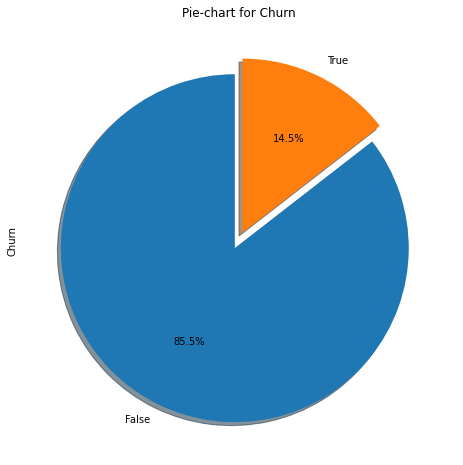

In [ ]:
# Piechart of churn variable
df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',startangle=90,shadow=True, figsize=(10,8))
plt.title('Pie-chart for Churn')
plt.show()

By looking at the above PieChart we understand that upto 14.5% of customers have churned

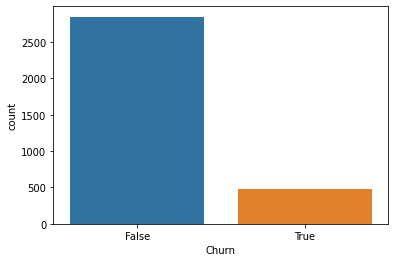

In [ ]:
# Countplot of Churn
sb.countplot(x=df.Churn)

After analyzing the churn column, we can say that upto 14.5% of customers have churned. Now let's see how other features of our data are related with churn

# Outliers

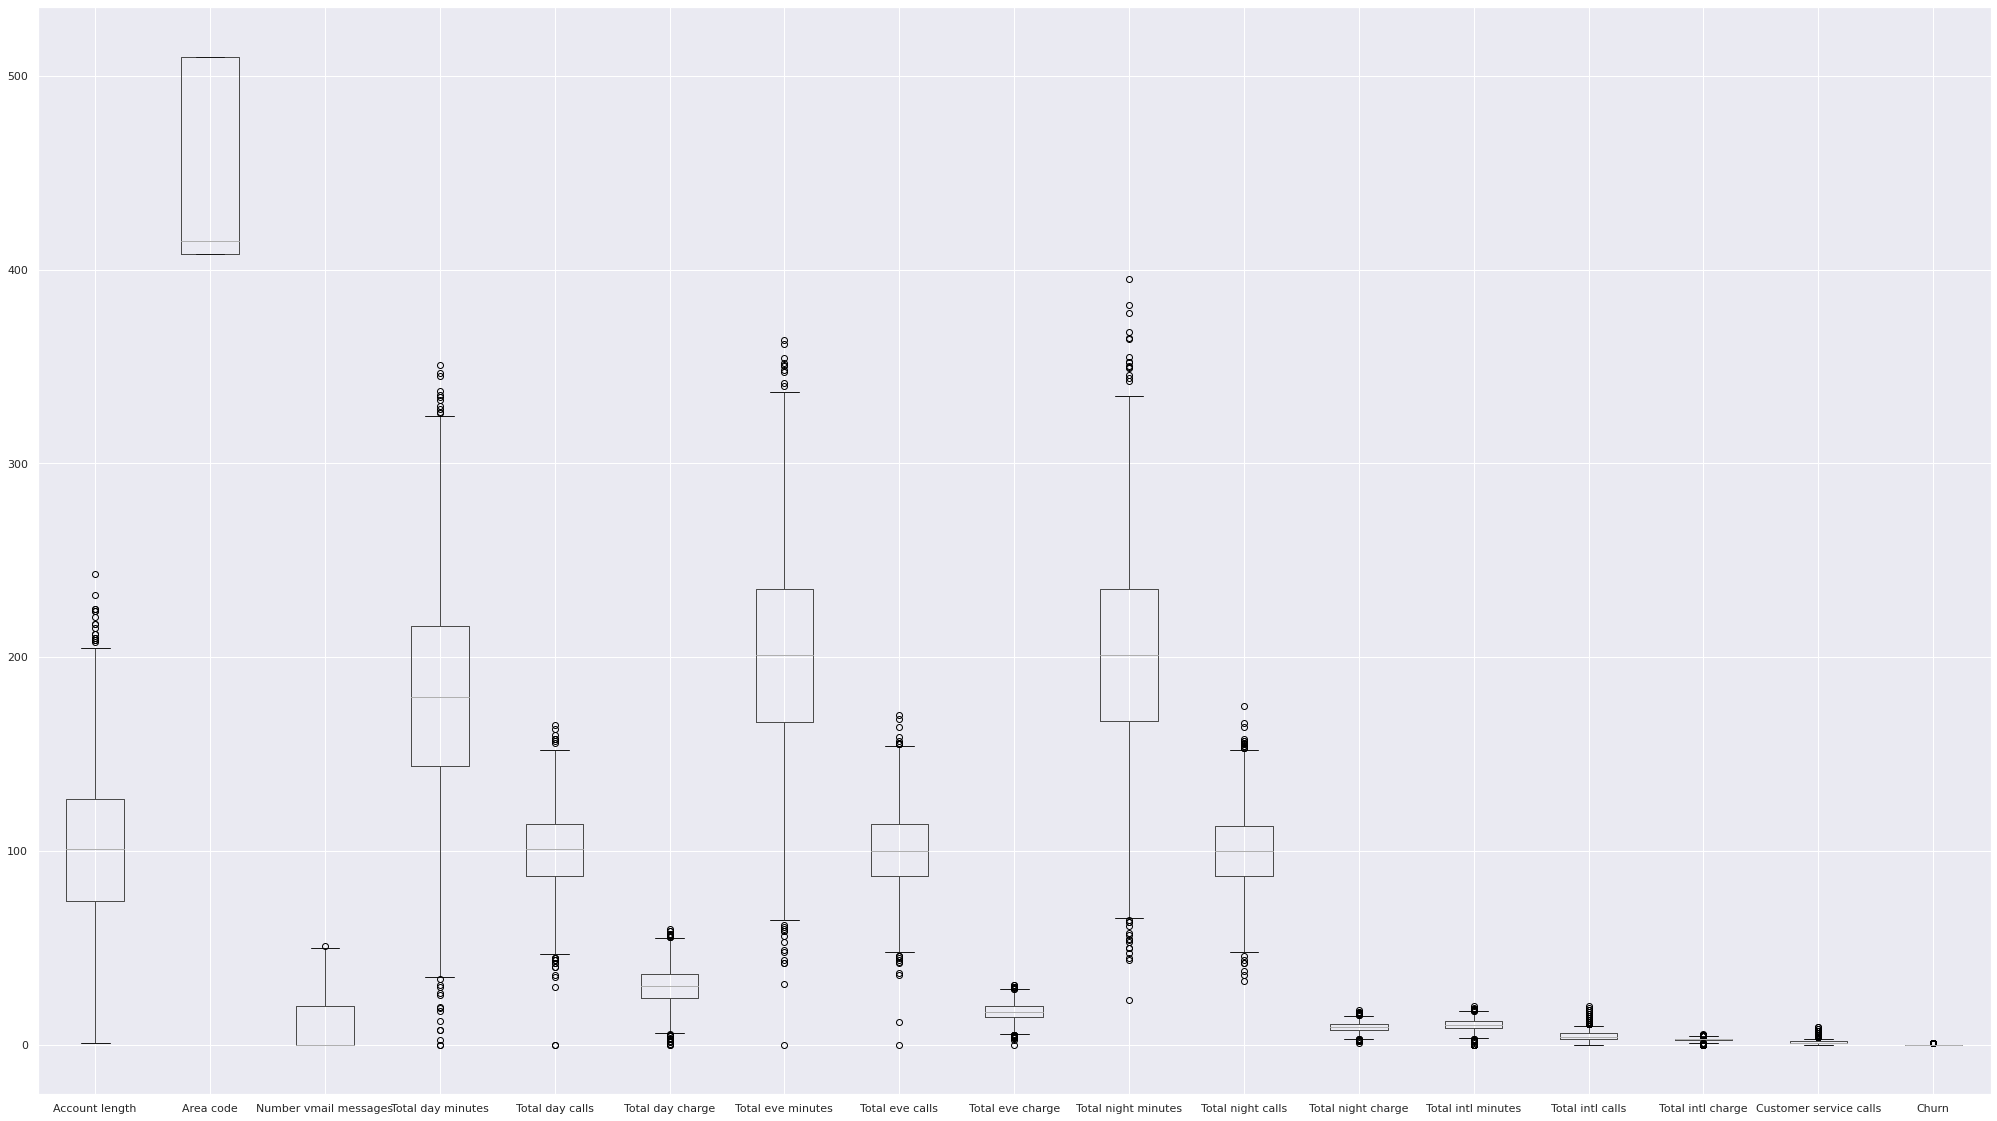

In [ ]:
#checking outliers in the data
boxplot=df.boxplot(figsize=(35,20))

Outliers is something important that we should be aware of, because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

#Analysing Churn rate State Wise



In [ ]:
# State wise churn percentage
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [ ]:
# Top 10 states with highest Churn rate
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

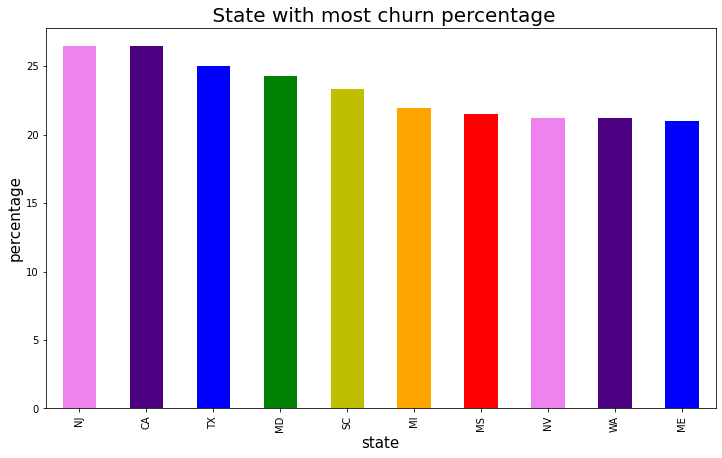

In [ ]:
# Top 10 states with highest churn on a graph
plt.rcParams['figure.figsize'] = (12, 7)
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

After Analysing state wise churn rate, we can say that NJ, CA, TX, MD, SC, MI, MS, NV, WA, ME have the most churn rate of more than 21%, there should be more focus on these states and more discounts and offers must be provided in order to reduce the Churn rate

In [ ]:
df['State'].nunique()

51

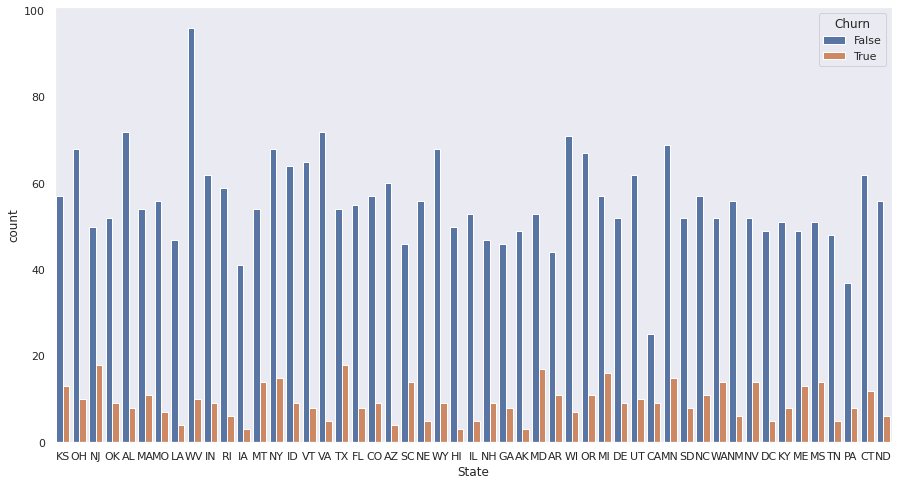

In [ ]:
#The graph shows the state wise churn 
sb.set(style="dark")
plt.figure(figsize=(15,8))
ax=sb.countplot(x='State',hue='Churn',data=df)
plt.show()

#Analysis Churn with Area Code


In [ ]:
# Calculate Area code with churn percentage
Area_code_data=pd.crosstab(df["Area code"],df["Churn"])
Area_code_data['percentage_churn']=Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(Area_code_data)


Churn      False  True  percentage_churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


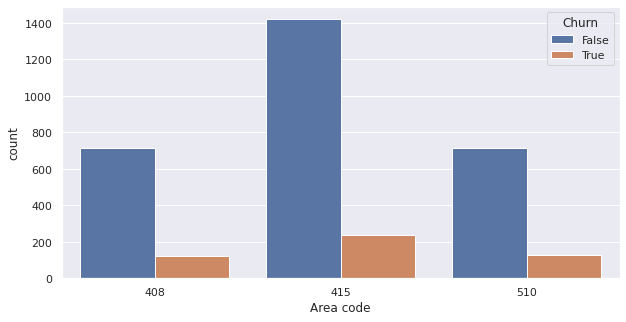

In [ ]:

sb.set(style=('darkgrid'))
plt.figure(figsize=(10,5))
ax=sb.countplot(x='Area code',hue='Churn',data=df)
plt.show()



In the above data, we can see there are 3 area code and the churn rate is almost same. We don't think there is any relation between area code and churn, but number wise area code 415 has highest number of churn customers, there should be more effort to reduce churn in area code 415

#Analyzing Churn with International plan

In [ ]:
# Finding the total number of customers with international plan active
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
# Calculate the International plan and churn percentage
International_plan_data=pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['percentage Churn']=International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis=1)
print(International_plan_data)

Churn               False  True  percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


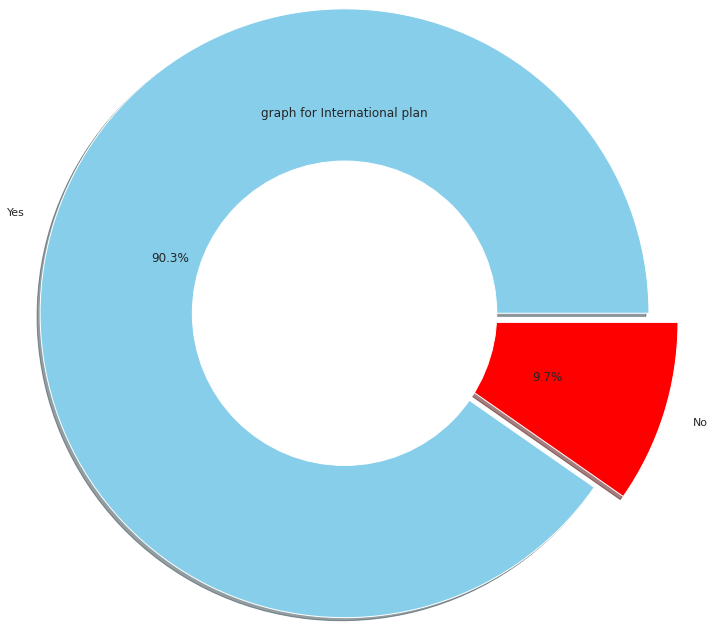

In [ ]:
# Donut plot to Analyze the International plan.
# In the graph the skyblue part shows the percentage of customers have international plan and red part shows who don't have international plan. 
data=df['International plan'].value_counts()
explode=(0,0.2)
plt.pie(data,explode=explode,autopct='%1.1f%%',shadow=True,radius=2.0,labels=['Yes','No'],colors=['skyblue','red'])
circle = plt.Circle((0,0),1,color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('graph for International plan')
plt.show()

As conclusion from this analysis, we can see that the number of customers with international plans is 325, however when 137 of those customers cancel the service, the churn rate is very high at 42.4148614%.

There should be more effort made in reducing this 

#Analyzing Customer Service calls

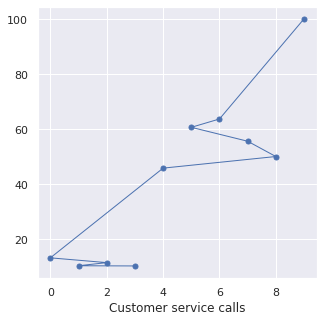

In [ ]:
# Graph shows the churn rate of customers and the number of times they have contacted customer service
((df.groupby(['Customer service calls'])['Churn'].mean())*100).sort_values(ascending = False).plot.line(color='b', marker='o', linewidth=1, markersize=5,figsize=(5,5))

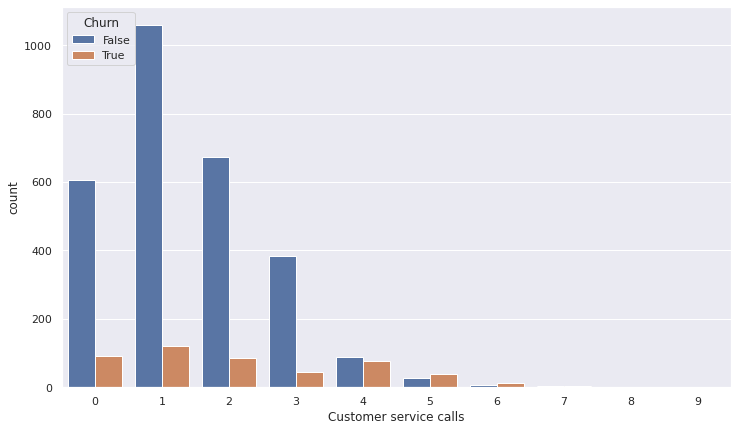

In [ ]:
#Count of churned accounts With respect to customer service calls 
sb.countplot(x='Customer service calls',hue="Churn",data=df)

 It is observed from the above analysis that, mostly because of bad customer service, people tend to leave the operator.

The above data indicating that those customers who called the service center 5 times or above those customer churn percentage is higher than 60%,

And customers who have called once also have a high churn rate indicating their issue was not solved in the first attempt.

So operator should work to improve the customer service and recieve feedback

In [ ]:
# Getting the headings of each column in dataset

df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## **Analyzing Voice mail column**

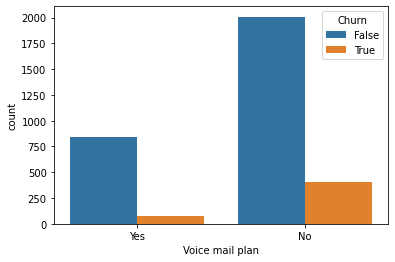

In [ ]:
sb.countplot(x='Voice mail plan',hue='Churn',data=df)

After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail messages then there is a churn

For that, we need to improve the voice mail quality.

# Analyzing the Total day, evening and night calls

Text(0.5, 0, 'Time of Calling')

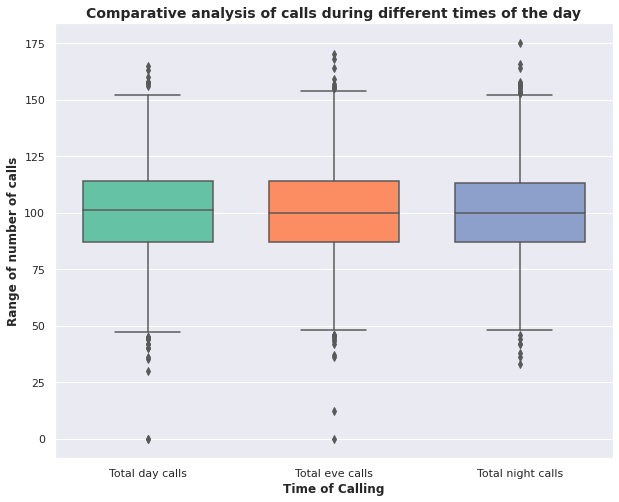

In [ ]:
# Outlier Analysis of Total day, eve, night calls 

attributes = ['Total day calls','Total eve calls','Total night calls',]
plt.rcParams['figure.figsize'] = [10,8]
sb.boxplot(data = df[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Comparative analysis of calls during different times of the day", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range of number of calls", fontweight = 'bold')
plt.xlabel("Time of Calling", fontweight = 'bold')

In [ ]:
df.rename(columns = {'Total day calls':'Total_day_calls', 'Total eve calls':'Total_eve_calls', 'Total night calls':'Total_night_calls'}, inplace = True)


In [ ]:
# Removing (statistical) outliers for total calls

Q1 = df.Total_night_calls.quantile(0.05)
Q3 = df.Total_night_calls.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Total_night_calls >= Q1 - 1.5*IQR) & (df.Total_night_calls <= Q3 + 1.5*IQR)]

Q1 = df.Total_eve_calls.quantile(0.05)
Q3 = df.Total_eve_calls.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Total_eve_calls >= Q1 - 1.5*IQR) & (df.Total_eve_calls <= Q3 + 1.5*IQR)]

Q1 = df.Total_day_calls.quantile(0.05)
Q3 = df.Total_day_calls.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.Total_day_calls >= Q1 - 1.5*IQR) & (df.Total_day_calls <= Q3 + 1.5*IQR)]

In [ ]:
# Rescaling the attributes

df_df = df[['Total_day_calls','Total_eve_calls', 'Total_night_calls']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_df_scaled = scaler.fit_transform(df_df)
df_df_scaled.shape

(3333, 3)

In [ ]:
df_df_scaled = pd.DataFrame(df_df_scaled)
df_df_scaled.columns = ['Total_day_calls','Total_eve_calls', 'Total_night_calls']
df_df_scaled.head()

,Total_day_calls,Total_eve_calls,Total_night_calls
0,0.476643,-0.055940,-0.465494
1,1.124503,0.144867,0.147825
2,0.675985,0.496279,0.198935
3,-1.466936,-0.608159,-0.567714
4,0.626149,1.098699,1.067803


In [ ]:
# Visualize the result

df["Churn"] = df["Churn"].astype(str) 
fig = px.scatter_3d(df, x='Total_day_calls', y='Total_eve_calls', z='Total_night_calls',
              color='Churn')
fig.show()

The above graph helps us to visualize the calls placed during day, evening and night and if they are churned or not in different states . 

In [ ]:
# Extracting the values for total charges placed during day, evening and night

df[['Total day charge','Total eve charge','Total night charge']]

,Total day charge,Total eve charge,Total night charge
0,45.07,16.78,11.01
1,27.47,16.62,11.45
2,41.38,10.30,7.32
3,50.90,5.26,8.86
4,28.34,12.61,8.41
...,...,...,...
3328,26.55,18.32,12.56
3329,39.29,13.04,8.61
3330,30.74,24.55,8.64
3331,36.35,13.57,6.26


#Analyzing the Total day, evening and night charges 

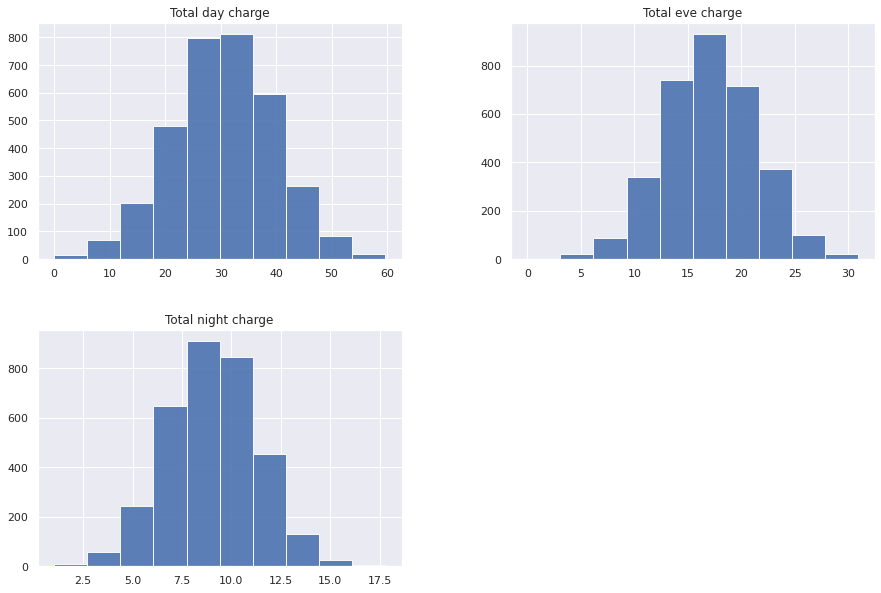

In [ ]:
# Ploting the graph for total charges for calls placed during day, eve and night each

df[['Total day charge','Total eve charge','Total night charge']].hist(figsize = (15,10), alpha = 0.9)

plt.show()

In [ ]:
# Average charge for day calls

df['Total day charge'].mean()

30.562307230723075

In [ ]:
# Average charge for eve calls

df['Total eve charge'].mean()

17.083540354035403

In [ ]:
# Average charge for night calls

df['Total night charge'].mean()

9.03932493249325

 If we try to understand the graphs on x axis are the total charges and on y axis are the number of calls during each time of the day. Comparing the charges for calls during day, evening and night it can be observed that the charges for calls during day are very high followed by evening and night. Average rate at which customers are placing call during day ranges betwwen 20 - 40, for evening it is approx. 15 - 19 and for night is 5.5 - 11.

The rates might be one of the possible reasons for customer churn or let's due to which the customers might opt for companies which offer the same service at cheaper rate.

If the company already has a wide range of plans  then it might be an another possibility that the customers are not aware about those plans .

#Relation Between Account Lenght and Churn

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


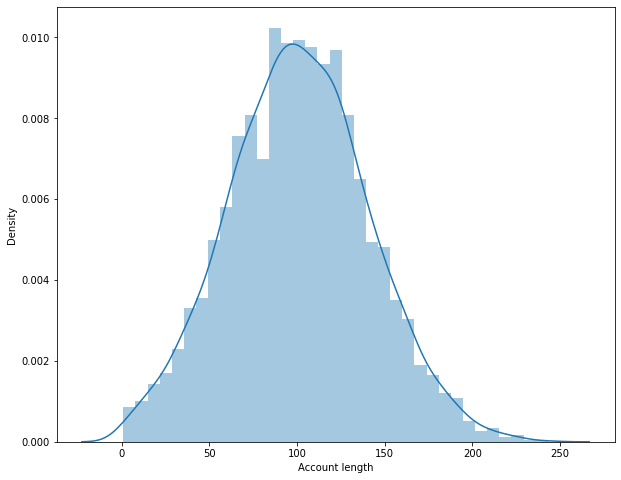

In [ ]:
# Creating and distribution plot of Account Length
telecom1=df.copy()
telecom1.head()
sb.distplot(telecom1['Account length'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


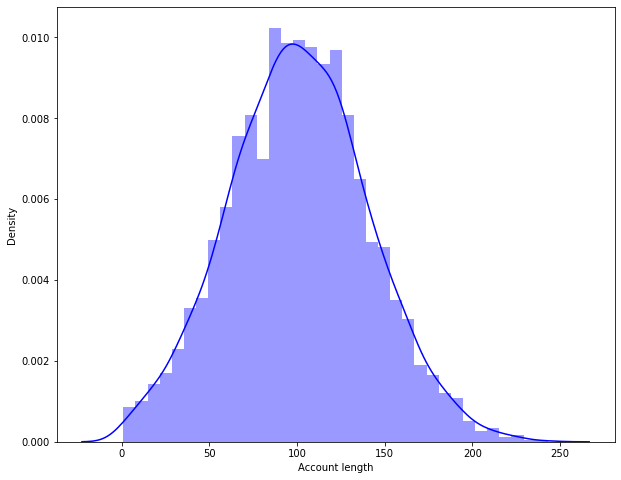

In [ ]:
# Comparing Account Lenght with Churn 
churn   = telecom1[telecom1["Churn"] == bool(True)]
sb.distplot(telecom1['Account length'],color = 'blue',label="All")
sb.distplot(churn['Account length'],color = "red",hist=False,label="Churn")

Observations:-

We can see that churn rate keeps rising till account length is 125 and keeps reducing after, by this we understand that there are more chances of a customer to churn while his account lenght is less than 125. More offers and discounts must be provided to customers of account length less than 125 as an effort to retain them.

#Conclusion

After performing exploratory data analysis on the data set, this is what we have understood:

There are some states where the churn rate is high as compared to others may be due to low network coverage. Area code and Account length do not play any kind of major role affecting the churn rate so,it's redundant data columns. In the International plan those customers who have this plan have high churn rate, international calling charges could be one of the reasons. Total day call minutes, total day calls, Total day charge, Total evening minutes, Total evening calls, Total evening charge, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate. In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service center didn't resolve the customer issue.

#Recommendations

Improve network coverage, upgrade network for better call quality

Provide more discounts, offers to international plan customers 

Provide more offers to customers whose account length is less than 125

Improve the service of call center and take frequently feedback from the customer regarding their issue and resolve issue as soon as possible